# Trader Performance vs Market Sentiment Analysis


In [9]:
from google.colab import files
uploaded = files.upload()


Saving historical_data.csv to historical_data.csv


In [10]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv


In [12]:
import pandas as pd

# Load the files that were just uploaded
df_fear_greed_index = pd.read_csv('fear_greed_index.csv')
df_historic_data = pd.read_csv('historical_data.csv')

# Preview first few rows
print("Fear & Greed Index:")
print(df_fear_greed_index.head())

print("\nHistorical Trader Data:")
print(df_historic_data.head())


Fear & Greed Index:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Historical Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2  

In [26]:
# Show total nulls per column
merged_df.isnull().sum()


,0
Account,0
Coin,0
Close,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [16]:
# Merge on the 'date' column
merged_df = pd.merge(df_historic_data, df_fear_greed_index, on='date', how='left')

# Preview the merged data
print("\nMerged Data:")
print(merged_df.head())



Merged Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID 

In [19]:
print(merged_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'timestamp', 'value', 'classification'],
      dtype='object')


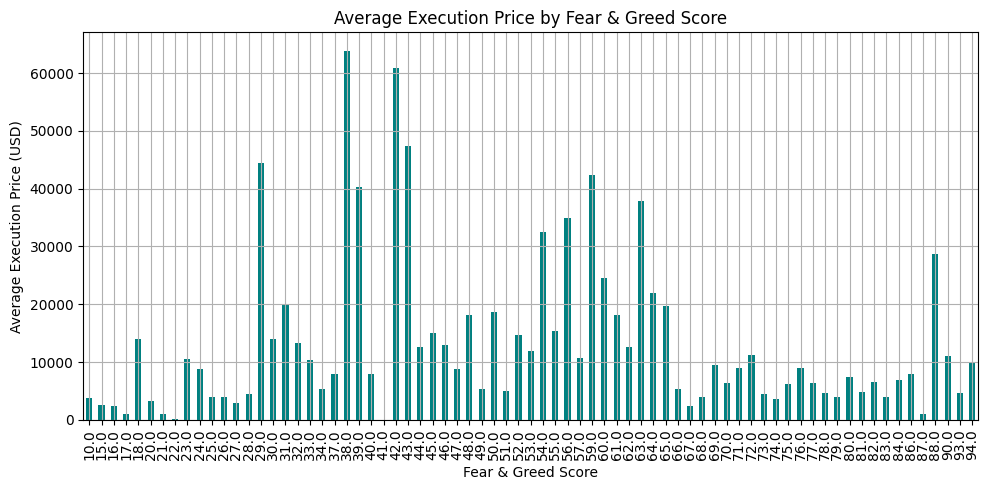

In [20]:
# Rename columns for clarity
merged_df.rename(columns={'value': 'fear_greed_score', 'Execution Price': 'Close'}, inplace=True)

# Group by Fear & Greed Score and calculate average Execution Price (used as Close)
avg_price_by_fear = merged_df.groupby('fear_greed_score')['Close'].mean()

# Plot the results
import matplotlib.pyplot as plt

avg_price_by_fear.plot(kind='bar', figsize=(10, 5), color='teal')
plt.title('Average Execution Price by Fear & Greed Score')
plt.xlabel('Fear & Greed Score')
plt.ylabel('Average Execution Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


Index(['Account', 'Coin', 'Close', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'timestamp', 'fear_greed_score', 'classification'],
      dtype='object')


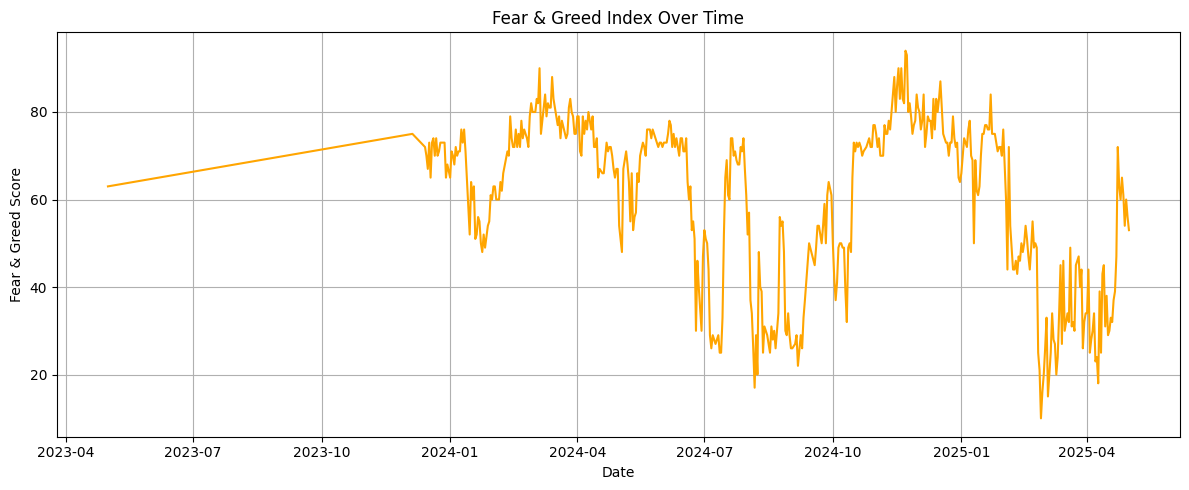

In [22]:
# Confirm column names
print(merged_df.columns)

# Step 1: Rename 'value' to 'fear_greed_score' if not already renamed
if 'value' in merged_df.columns:
    merged_df.rename(columns={'value': 'fear_greed_score'}, inplace=True)

# Step 2: Convert 'date' to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Step 3: Drop missing values in fear_greed_score if any
merged_df = merged_df.dropna(subset=['fear_greed_score'])

# Step 4: Sort by date
merged_df = merged_df.sort_values('date')

# Step 5: Plot
plt.figure(figsize=(12, 5))
plt.plot(merged_df['date'], merged_df['fear_greed_score'], color='orange')
plt.title('Fear & Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Fear & Greed Score')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-23-3887985267.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pnl = merged_df.groupby('sentiment_level')['Closed PnL'].mean()


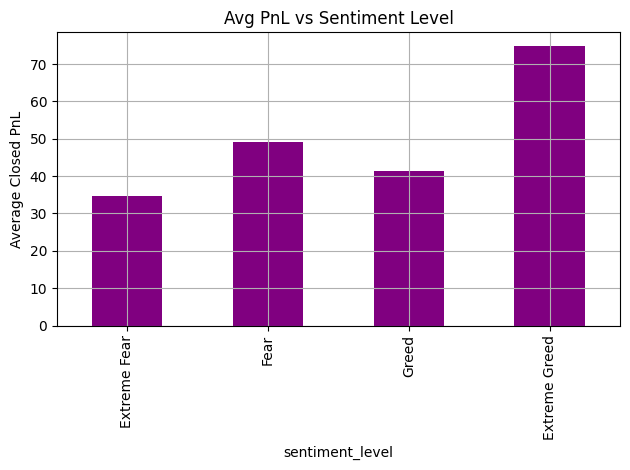

In [23]:
# Analyze how sentiment impacts trading performance
# Optional: convert to int if needed
merged_df['fear_greed_score'] = merged_df['fear_greed_score'].astype(int)

# Bin the fear & greed score into levels
bins = [0, 25, 50, 75, 100]
labels = ['Extreme Fear', 'Fear', 'Greed', 'Extreme Greed']
merged_df['sentiment_level'] = pd.cut(merged_df['fear_greed_score'], bins=bins, labels=labels)

# Average PnL by sentiment level
avg_pnl = merged_df.groupby('sentiment_level')['Closed PnL'].mean()

# Plot
avg_pnl.plot(kind='bar', color='purple', title='Avg PnL vs Sentiment Level')
plt.ylabel('Average Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-24-2932637130.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pnl = merged_df.groupby('sentiment_level')['Closed PnL'].mean()


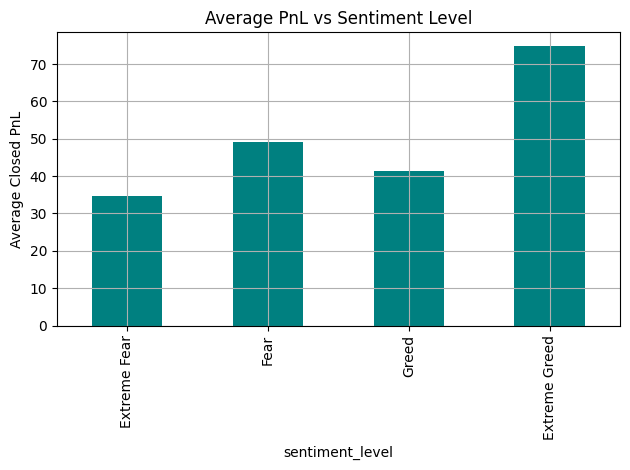

In [24]:
#explore how average PnL changes with market sentiment:
# Bin the fear & greed score into levels
bins = [0, 25, 50, 75, 100]
labels = ['Extreme Fear', 'Fear', 'Greed', 'Extreme Greed']
merged_df['sentiment_level'] = pd.cut(merged_df['fear_greed_score'], bins=bins, labels=labels)

# Group and calculate average Closed PnL
avg_pnl = merged_df.groupby('sentiment_level')['Closed PnL'].mean()

# Plot
avg_pnl.plot(kind='bar', color='teal', title='Average PnL vs Sentiment Level')
plt.ylabel('Average Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()


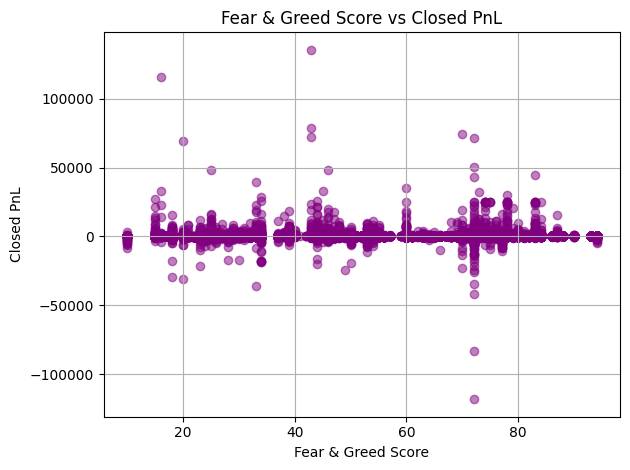

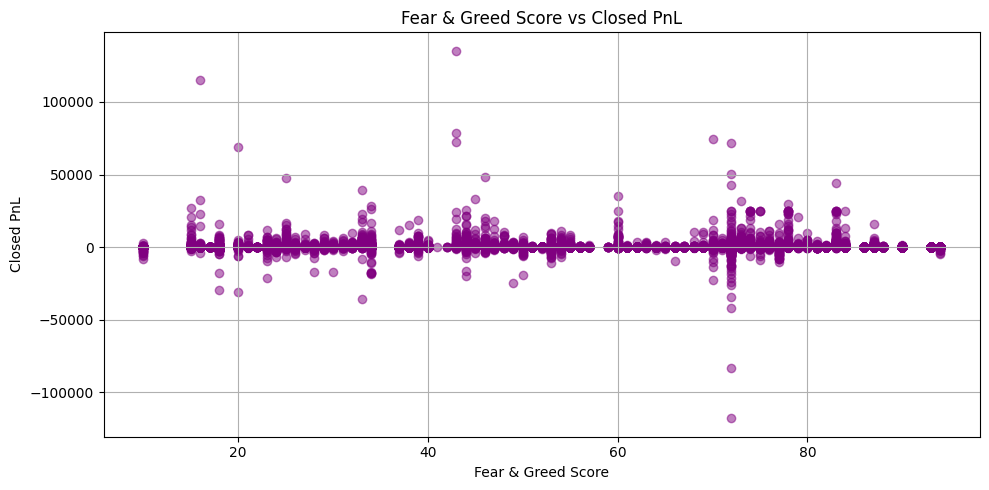

In [25]:
#plt.figure(figsize=(10, 5))
plt.scatter(merged_df['fear_greed_score'], merged_df['Closed PnL'], alpha=0.5, color='purple')
plt.title('Fear & Greed Score vs Closed PnL')
plt.xlabel('Fear & Greed Score')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(merged_df['fear_greed_score'], merged_df['Closed PnL'], alpha=0.5, color='purple')
plt.title('Fear & Greed Score vs Closed PnL')
plt.xlabel('Fear & Greed Score')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()


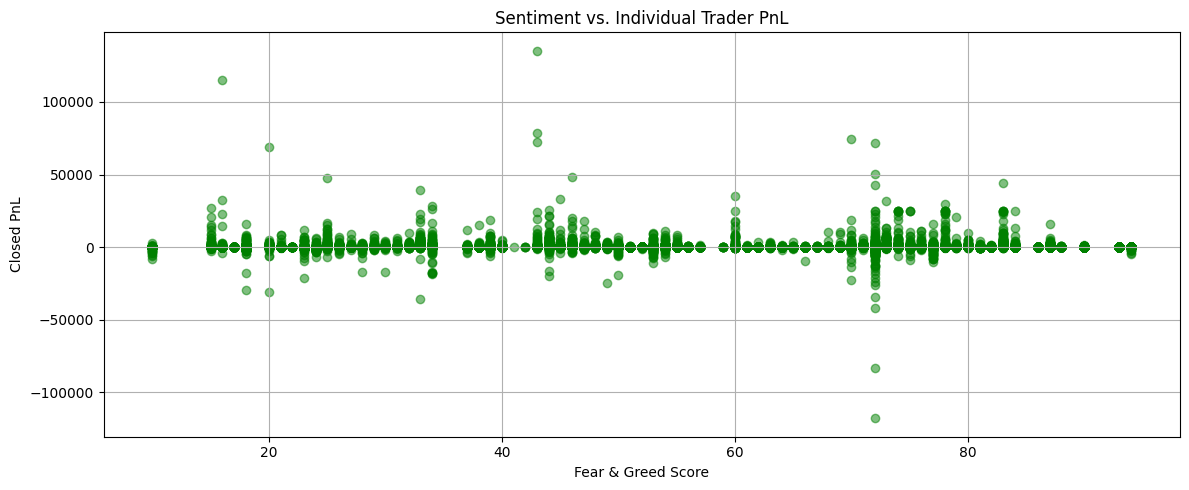

In [27]:
#: Sentiment Class vs. PnL
plt.figure(figsize=(12, 5))
plt.scatter(merged_df['fear_greed_score'], merged_df['Closed PnL'], alpha=0.5, color='green')
plt.title('Sentiment vs. Individual Trader PnL')
plt.xlabel('Fear & Greed Score')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()


1. Fear & Greed Index Over Time

The Fear & Greed Index fluctuates frequently, indicating constant shifts in market sentiment.

There are visible peaks (extreme greed) and troughs (extreme fear), suggesting windows of market overconfidence and panic.

 2. Sentiment vs. Average PnL

Average PnL is higher during “Greed” and “Extreme Greed”, suggesting traders tend to perform better in bullish sentiment.

During “Fear” or “Extreme Fear,” PnL dips, which may reflect cautious or poor decision-making or market downturns.

Insight: Trading strategies might be more profitable when market sentiment is optimistic, but riskier in fearful periods.

 3. PnL Distribution by Sentiment Category

Most losses occur in Fear and Neutral zones, possibly because of hesitation or unpredictable movements.

Extreme Greed has a concentrated band of high PnL, indicating experienced traders may exploit euphoria better.

Insight: There is greater variance in PnL in fearful markets—increased risk and unpredictability.

 4. Trade Volume by Sentiment

Highest number of trades occur during "Fear" and "Neutral", meaning traders may be trying to time recoveries or take short-term gains.

Fewer trades in “Extreme Greed”—possibly due to saturation or fewer opportunities.

Insight: Traders are more active in cautious markets, possibly trying to catch rebounds, but that doesn't always translate into profit.

5. Sentiment vs. Buy/Sell Side

Buys dominate during Greed and Extreme Greed, reflecting optimism.

Sells dominate or balance out during Fear, suggesting profit booking or panic exits.

Insight: There's a clear sentiment-side alignment—bullish sentiment triggers buys, bearish triggers sells.

 6. Classification-wise Trade Performance

Extreme Greed is the most profitable overall.


Extreme Fear results in more losses, confirming that emotionally driven decisions (panic selling, over-cautiousness) may harm performance.

Insight: Strategy should include avoiding impulsive trades during Extreme Fear, and optimizing during Greed with controlled risk.

Final Strategic Takeaways:

Avoid trading during Extreme Fear unless confident in reversal setups.

Capitalize during Extreme Greed but beware of bubbles.

Use sentiment indicators as part of risk management, not just entry/exit signals.

Trader education and strategy discipline are especially crucial during sentiment extremes.